In [1]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras as keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], 28, 28, 1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], 28, 28, 1)

1.13.1


In [2]:
h = 64

classes = 10
batch = 16

In [3]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3, 3), input_shape=(28,28,1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(keras.layers.Dense(h))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(h))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(h))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(classes))
model.add(keras.layers.Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=batch)
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

Epoch 1/4
60000/60000 [==============================] - 719s 12ms/sample - loss: 0.2526 - acc: 0.9227
Epoch 2/4
60000/60000 [==============================] - 725s 12ms/sample - loss: 0.0915 - acc: 0.9744
Epoch 3/4
60000/60000 [==============================] - 719s 12ms/sample - loss: 0.0689 - acc: 0.9811
Epoch 4/4
10000/10000 [==============================] - 26s 3ms/sample - loss: 0.0579 - acc: 0.9843
0.057889723267429506
0.9843


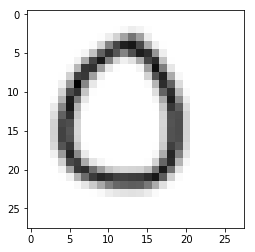

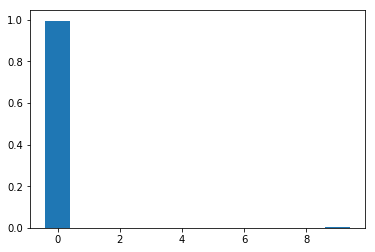

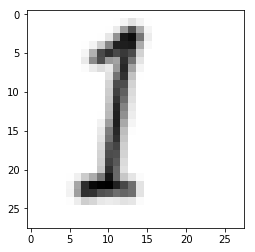

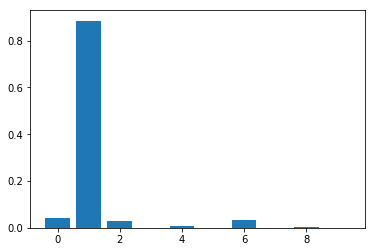

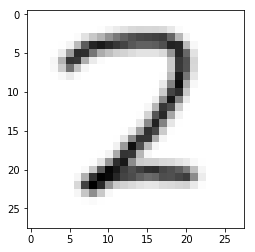

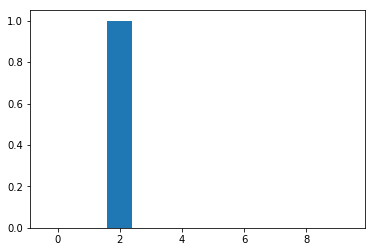

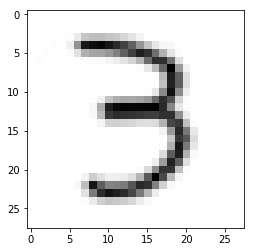

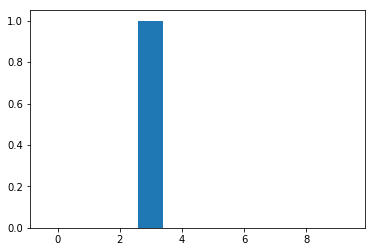

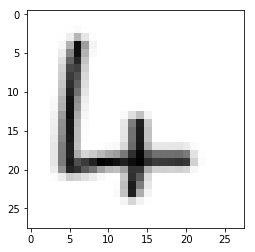

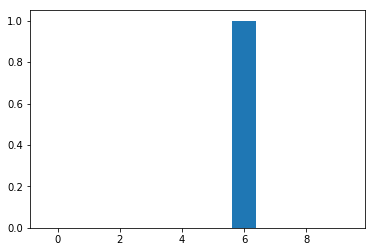

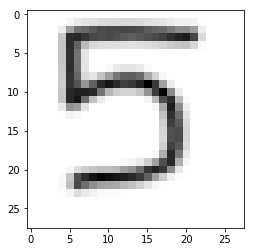

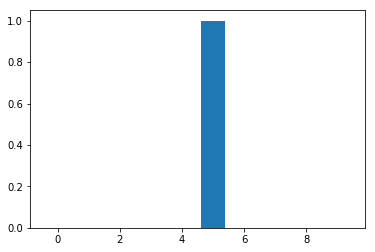

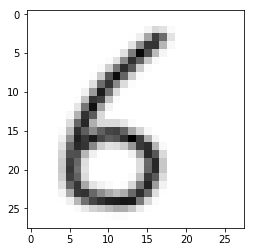

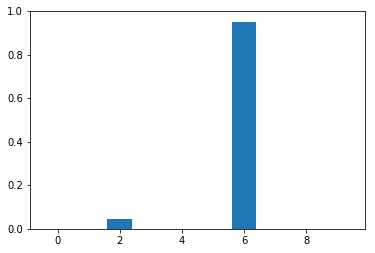

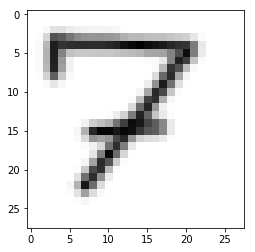

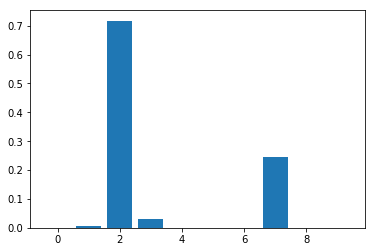

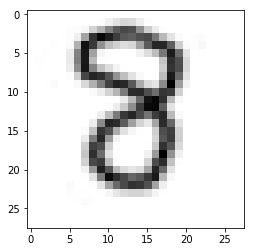

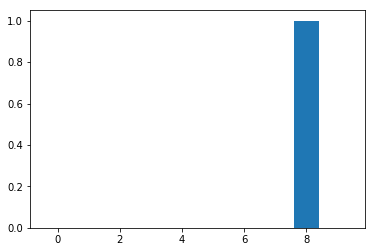

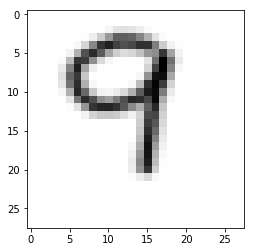

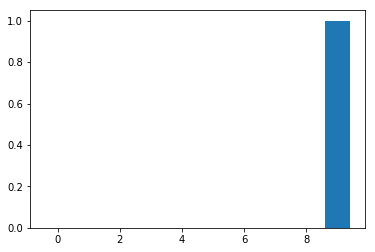

num_reader_2019-05-20_20-57-35.model


In [5]:
for i in range(10):
    pic = Image.open("{}.png".format(i))
    data = np.array([pic.getdata()],dtype=np.float32)/255

    plt.imshow(data.reshape((28,28)),cmap=plt.cm.binary)
    plt.show()

    prediction = model.predict(data.reshape((1,28,28,1)))
    plt.bar(range(10),prediction[0])
    plt.show()

import datetime
modelName = 'num_reader_{}'.format(datetime.datetime.now()).replace(' ','_').replace(':','-')[:-7]+'.model'
model.save(modelName)
print('Saved model as: '+modelName)